### 13.1 K近邻分类算法

In [4]:
# 第一步导入数据
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
#将iris数据集导入dataframe中查看数据
pd.DataFrame(iris.data,columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Populating the interactive namespace from numpy and matplotlib


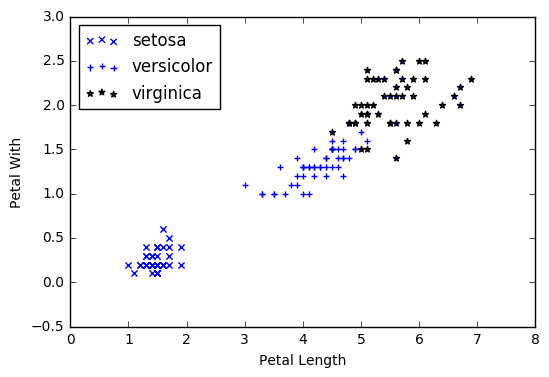

In [16]:
# 绘制花瓣长度和花瓣宽度的散点图
import matplotlib.pyplot as plt  
%pylab inline
iris_setosa = iris.data[:50]         # setosa的数据    
iris_versicolor = iris.data[50:100]  # versicolor的数据   
iris_virginica = iris.data[100:150]  # virginica的数据  
plt.scatter(iris_setosa[:,2],iris_setosa[:,3],marker='x')         #绘制setosa
plt.scatter(iris_versicolor[:,2],iris_versicolor[:,3],marker='+') #绘制versicolor
plt.scatter(iris_virginica[:,2],iris_virginica[:,3],marker='*')   #绘制virginica
plt.legend(['setosa', 'versicolor','virginica'],loc = 'upper left')  #绘制图例
plt.xlabel('Petal Length')  
plt.ylabel('Petal With')

In [7]:
# 第二步定义模型并训练模型
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2= KNeighborsClassifier(n_neighbors=5)
knn3= KNeighborsClassifier(n_neighbors=10)
knn1.fit(iris.data,iris.target)
knn2.fit(iris.data,iris.target)
knn3.fit(iris.data,iris.target)
#第三步模型预测
predicted1=knn1.predict(iris.data)
predicted2=knn2.predict(iris.data)
predicted3=knn3.predict(iris.data)
#第四步模型评估，计算三个模型的预测精度
accuracy1=sum(iris.target==predicted1)/len(iris.target)
accuracy2=sum(iris.target==predicted2)/len(iris.target)
accuracy3=sum(iris.target==predicted3)/len(iris.target)

In [8]:
#通过accuracy_score计算模型的分类准确率
from sklearn.metrics import accuracy_score
accuracy_score(iris.target,predicted1)

1.0

### 13.2 决策树分类算法

In [10]:
#在iris数据集上训练决策树模型
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
#导入数据
iris = load_iris()
#定义模型训练模型
dtree=tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(iris.data,iris.target)
#预测
predicted=dtree.predict(iris.data)
#评估模型分类准确率
accuracy_score(iris.target,predicted)

1.0

Populating the interactive namespace from numpy and matplotlib


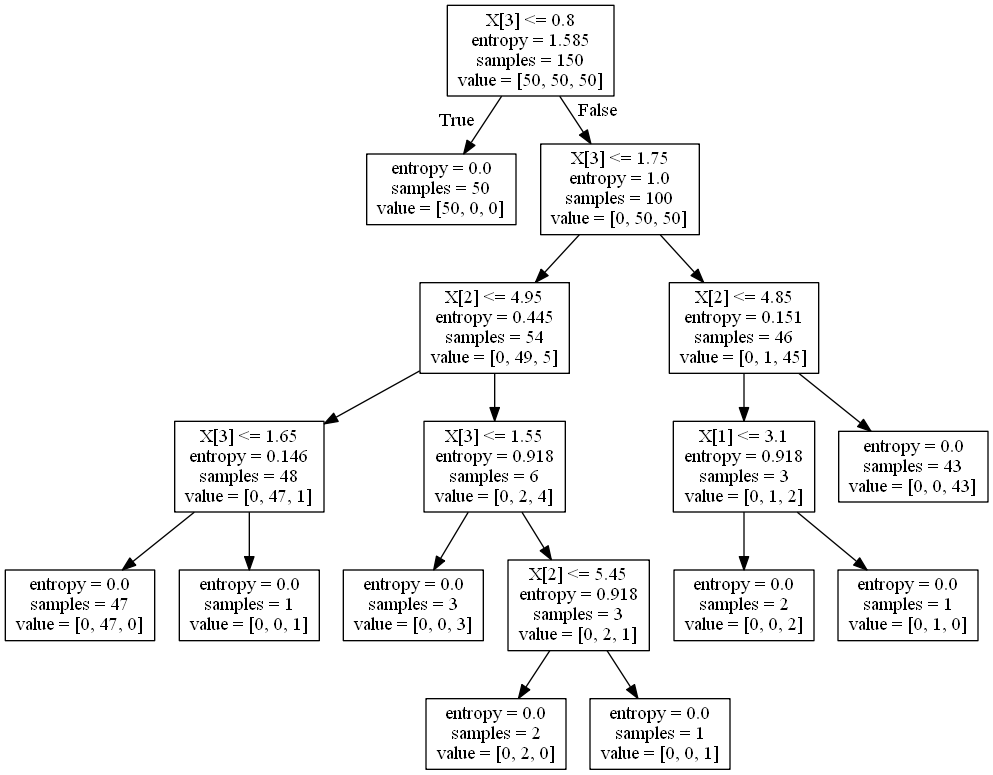

In [12]:
#导出决策图
tree.export_graphviz(dtree, out_file='dtree.dot')
#将转换后的dtree.png图片显示在jupyter中
%pylab inline   
from IPython.display import Image
Image('dtree.png')


In [13]:
#查看决策过程中样本特征的重要程度
print(dtree.feature_importances_)

[ 0.02317521  0.          0.64544598  0.33137881]


### 13.3 随机森林分类算法

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
#导入数据
iris = load_iris()
#定义模型训练模型
rf = RandomForestClassifier(n_estimators =100,criterion='entropy',random_state=1)  
rf.fit(iris.data,iris.target)
#预测
rfpredict=rf.predict(iris.data)
#评估模型精度
accuracy_score(iris.target,rfpredict)
#显示决策特征的重要程度
print(rf.feature_importances_)

[ 0.12103887  0.02612277  0.41833763  0.43450073]
